# Regression
In many ways, regression analysis lives at the heart of statistics.

For the remainder of this chapter, I’ll describe how to use R functions to fit OLS regression models, evaluate the fit, test assumptions, and select among competing models.

## OLS regression

### Simple Linear Regression
The dataset "women" provides the height and weight for a set of 15 women ages 30 to 39. If we want to predict weight from height, we could use simple linear regression.

In [1]:
fit = lm(weight ~ height, data=women)

In [2]:
summary(fit)


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


In [3]:
women$weight

[1] 115 117 120 123 126 129 132 135 139 142 146 150 154 159 164

In [4]:
fitted(fit)

1        2        3        4        5        6        7        8 
112.5833 116.0333 119.4833 122.9333 126.3833 129.8333 133.2833 136.7333 
       9       10       11       12       13       14       15 
140.1833 143.6333 147.0833 150.5333 153.9833 157.4333 160.8833

In [5]:
residuals(fit)

1           2           3           4           5           6 
 2.41666667  0.96666667  0.51666667  0.06666667 -0.38333333 -0.83333333 
          7           8           9          10          11          12 
-1.28333333 -1.73333333 -1.18333333 -1.63333333 -1.08333333 -0.53333333 
         13          14          15 
 0.01666667  1.56666667  3.11666667

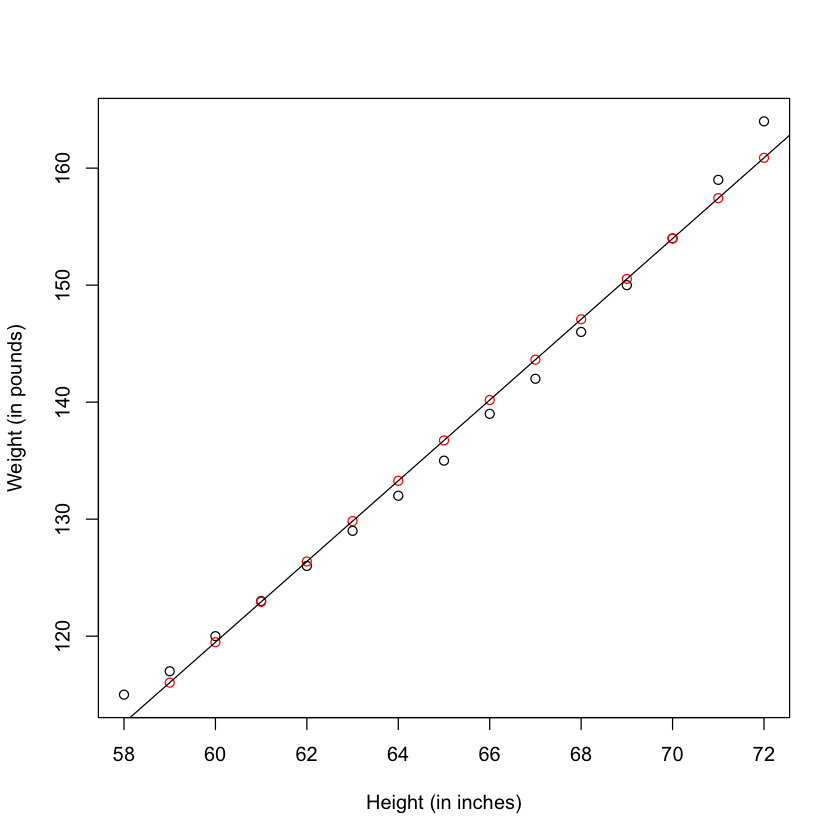

In [6]:
plot(women$height, women$weight, xlab="Height (in inches)", ylab="Weight (in pounds)")
points(women$height, fitted(fit), col='red')
abline(fit)

### Polynomal regression
Figure mentioned before may suggest that we could improve the prediction using a regression with a quadratic term ($X^2$). We might fit a quadratic equation using following statement.

In [7]:
fit2 = lm(weight ~ height + I(height^2), data=women)
summary(fit2)


Call:
lm(formula = weight ~ height + I(height^2), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50941 -0.29611 -0.00941  0.28615  0.59706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 261.87818   25.19677  10.393 2.36e-07 ***
height       -7.34832    0.77769  -9.449 6.58e-07 ***
I(height^2)   0.08306    0.00598  13.891 9.32e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3841 on 12 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9994 
F-statistic: 1.139e+04 on 2 and 12 DF,  p-value: < 2.2e-16


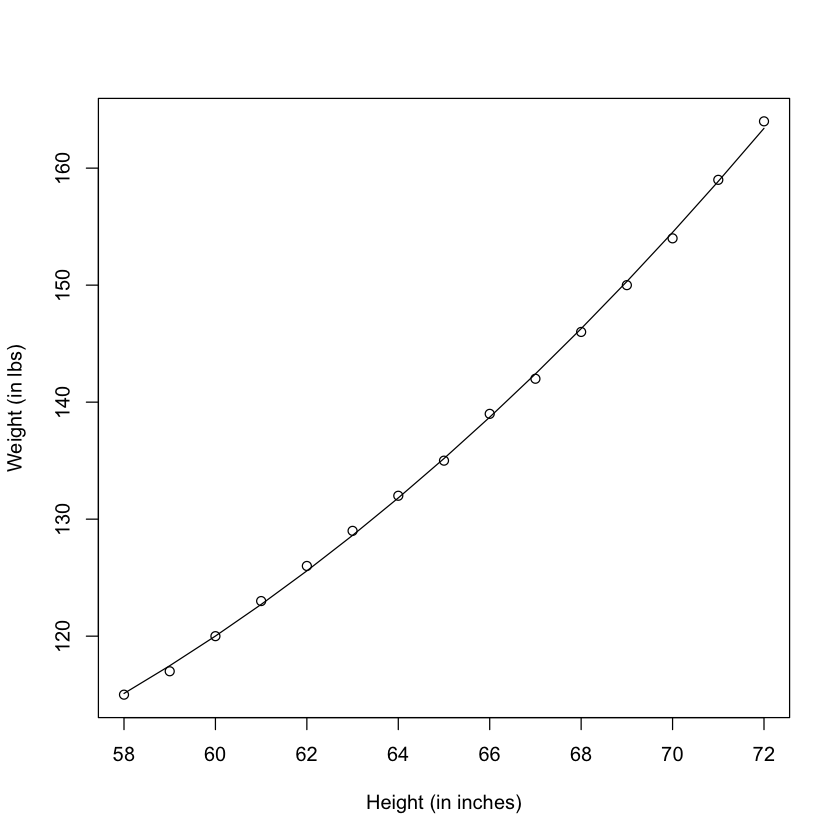

In [8]:
plot(women$height, women$weight, xlab="Height (in inches)", ylab="Weight (in lbs)")
lines(women$height, fitted(fit2))

Loading required package: carData


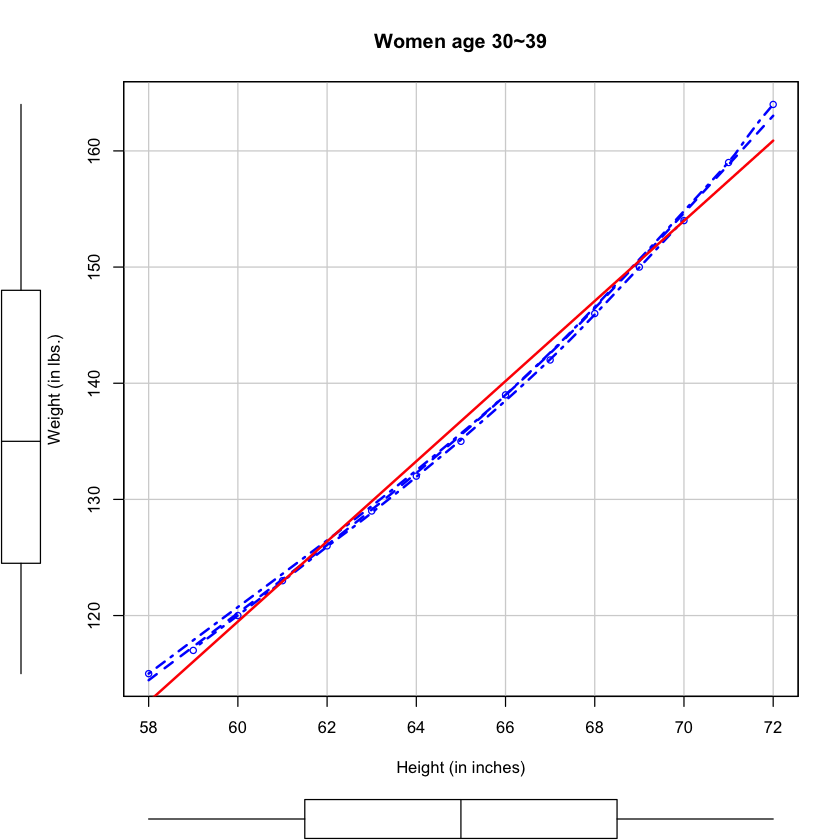

In [9]:
library(car)
scatterplot(weight ~ height, data=women, regLine = list(method=lm, lty=1, lwd=2, col='red'), smooth=TRUE,
            main="Women age 30~39", xlab="Height (in inches)", ylab="Weight (in lbs.)")

In [10]:
help(scatterplot)

### Multiple Linear Regression

In [11]:
states = as.data.frame(state.x77[, c("Murder", "Population", "Illiteracy", "Income", "Frost")])
head(states)

,Murder,Population,Illiteracy,Income,Frost
Alabama,15.1,3615,2.1,3624,20
Alaska,11.3,365,1.5,6315,152
Arizona,7.8,2212,1.8,4530,15
Arkansas,10.1,2110,1.9,3378,65
California,10.3,21198,1.1,5114,20
Colorado,6.8,2541,0.7,4884,166


In [12]:
cor(states)

,Murder,Population,Illiteracy,Income,Frost
Murder,1.0000000,0.3436428,0.7029752,-0.2300776,-0.5388834
Population,0.3436428,1.0000000,0.1076224,0.2082276,-0.3321525
Illiteracy,0.7029752,0.1076224,1.0000000,-0.4370752,-0.6719470
Income,-0.2300776,0.2082276,-0.4370752,1.0000000,0.2262822
Frost,-0.5388834,-0.3321525,-0.6719470,0.2262822,1.0000000


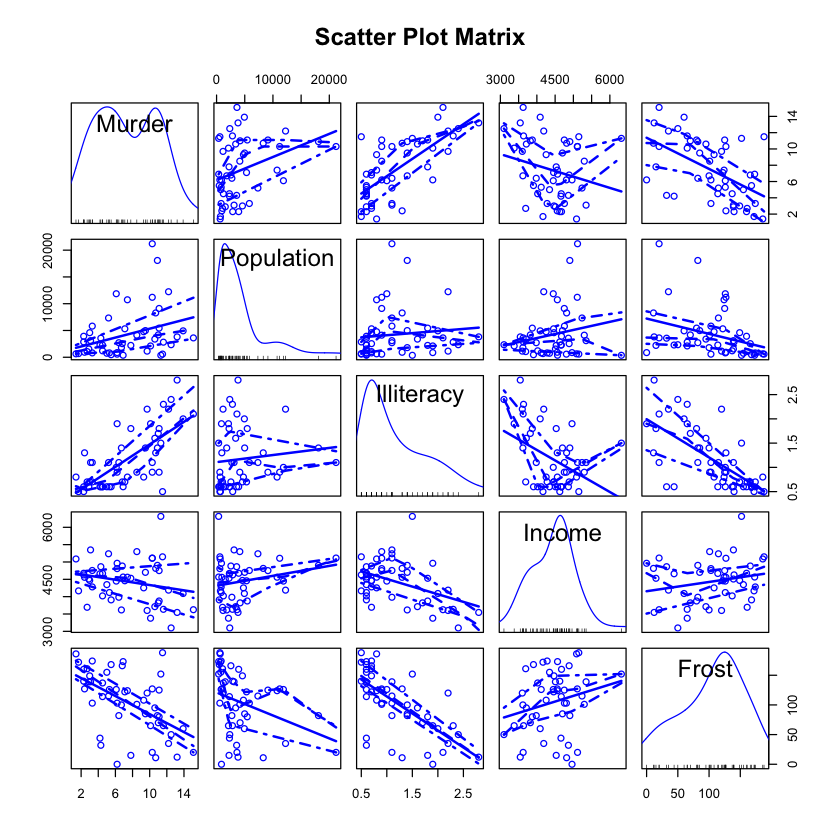

In [13]:
library(car)
scatterplotMatrix(states, main="Scatter Plot Matrix", 
                  smooth = list(smoother=quantregLine, var=TRUE, span=1, lwd=4, lwd.var=2))

In [14]:
fit = lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
summary(fit)


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


### Multiple Linear Regression with Interactions

In [15]:
fit = lm(mpg ~ hp + wt + hp:wt, data=mtcars)
summary(fit)


Call:
lm(formula = mpg ~ hp + wt + hp:wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0632 -1.6491 -0.7362  1.4211  4.5513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.80842    3.60516  13.816 5.01e-14 ***
hp          -0.12010    0.02470  -4.863 4.04e-05 ***
wt          -8.21662    1.26971  -6.471 5.20e-07 ***
hp:wt        0.02785    0.00742   3.753 0.000811 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.153 on 28 degrees of freedom
Multiple R-squared:  0.8848,	Adjusted R-squared:  0.8724 
F-statistic: 71.66 on 3 and 28 DF,  p-value: 2.981e-13


Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 
lattice theme set by effectsTheme()
See ?effectsTheme for details.


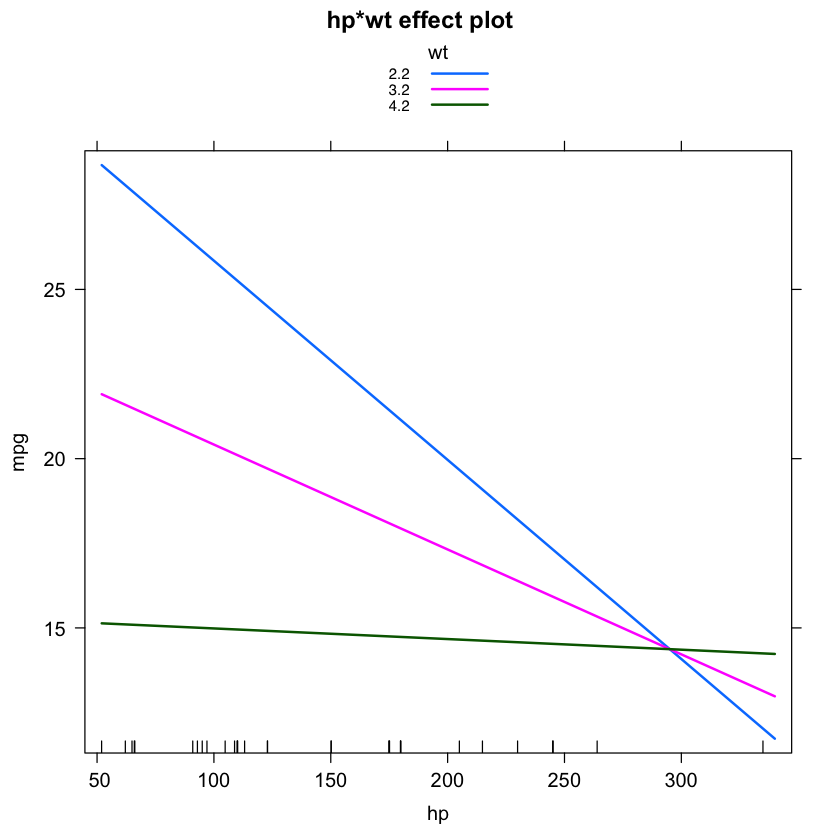

In [16]:
library(effects)
plot(effect("hp:wt", fit, , list(wt=c(2.2, 3.2, 4.2))), multiline = TRUE)

## Regression Diagnostics
A set of techniques called regression diagnostics provides that necessary tools for evaluating the appropriateness of regression model and can help us to uncover and correct problems. 

 - Normality
 - Independence
 - Linearity
 - Homoscedasticity

### A Typical Approach

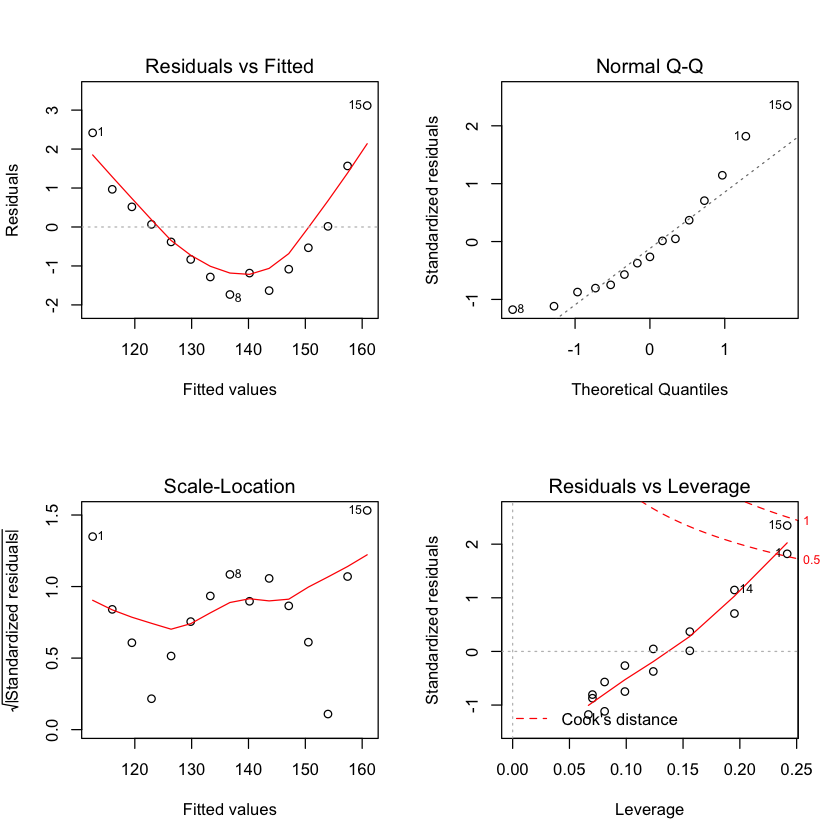

In [17]:
fit = lm(weight ~ height, data = women)
par(mfrow=c(2,2))
plot(fit)

if we consider the height^2 into the regression

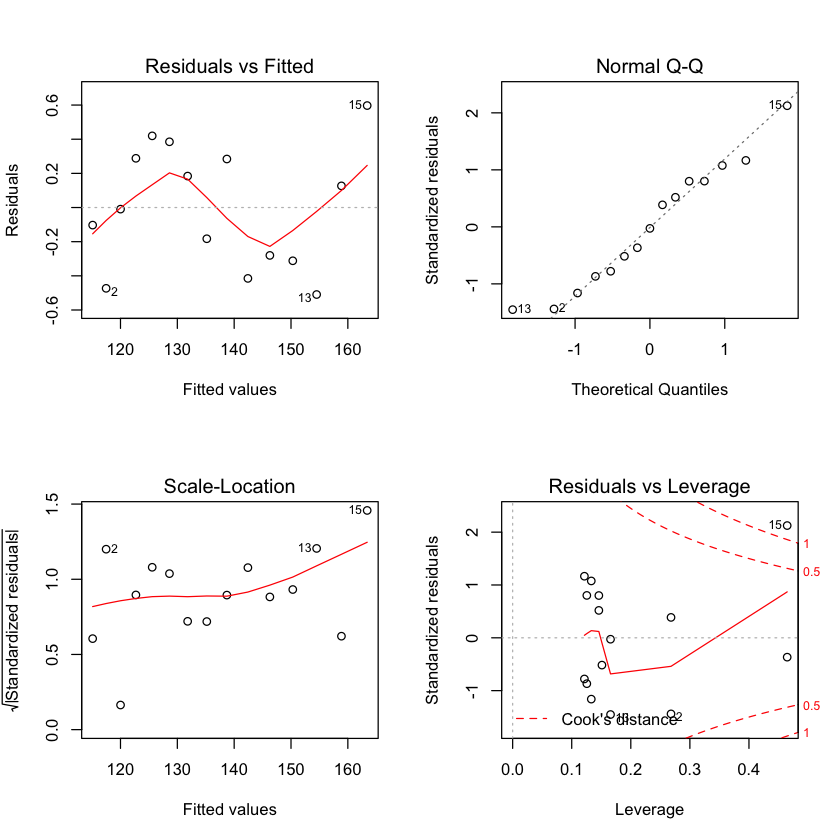

In [18]:
fit2 = lm(weight ~ height + I(height^2), data = women)
par(mfrow=c(2,2))
plot(fit2)

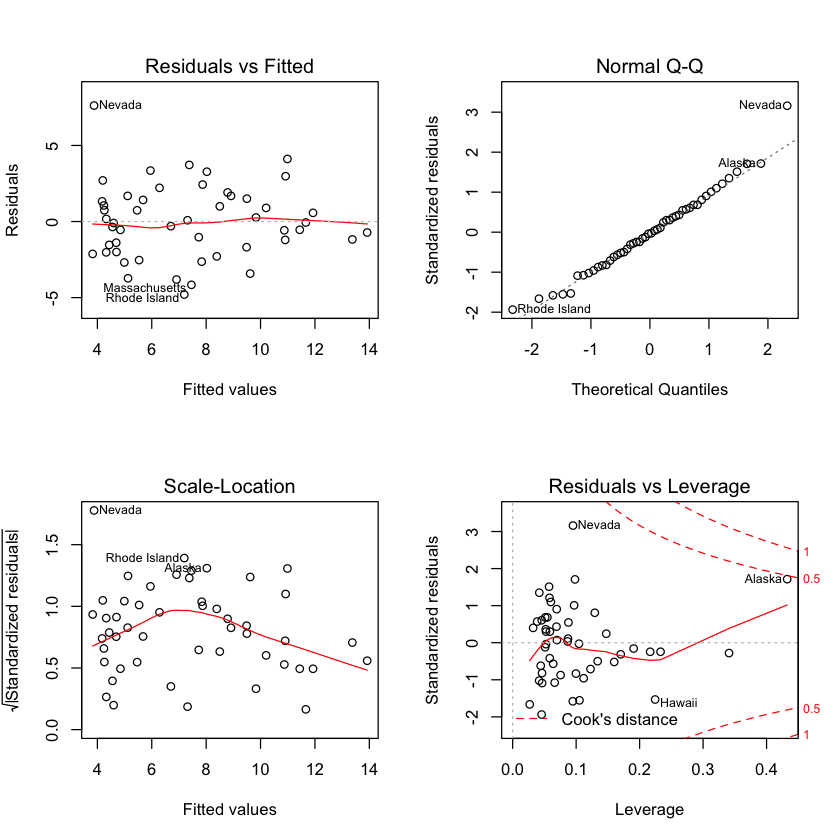

In [19]:
states = as.data.frame(state.x77[, c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit = lm(Murder ~ Population + Illiteracy + Income + Frost, data = states)
par(mfrow = c(2,2))
plot(fit)

### An Enhanced Approach
The car package provides a number of functions that significantly enhance your ability to fit and evaluate regression models.

 - qqplot()
 - durbinWatsonTest()
 - crPlots()
 - ncvTest() 
 - spreadLevelPlot()
 - outlierTest()
 - avPlots()
 - influencePlot()
 - scatterplotMatrix()
 - vif()

#### 1 Validate the normality using Q-Q plot

Nevada Rhode Island 
          28           39

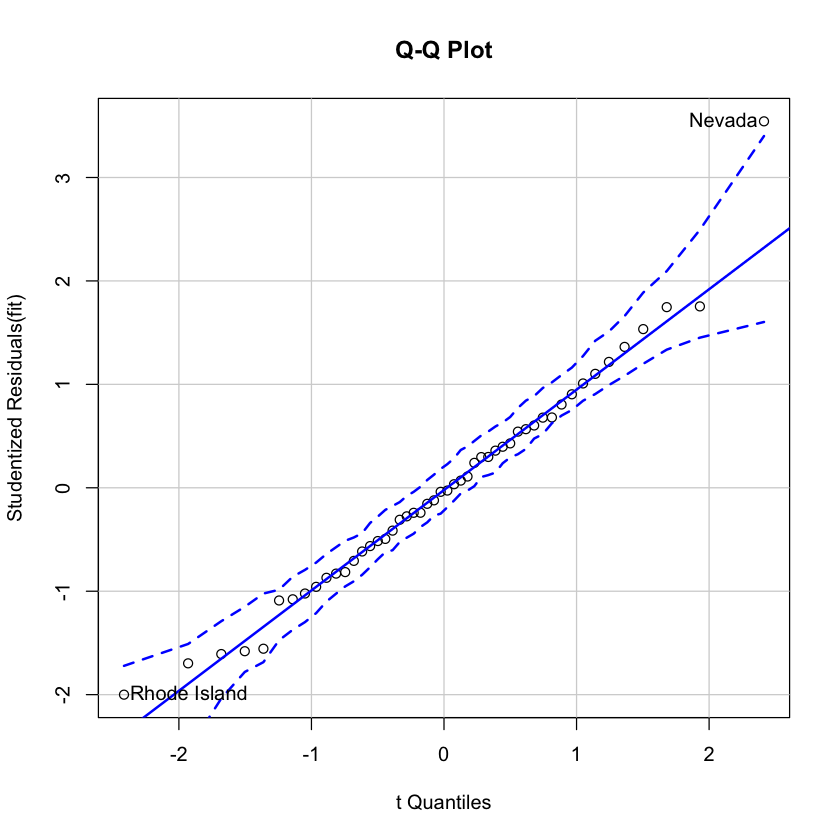

In [20]:
library(car)
states = as.data.frame(state.x77[, c("Murder", "Population", "Illiteracy", "Income", "Frost")])
fit = lm(Murder ~ Population + Illiteracy + Income + Frost, data = states)
qqPlot(fit, labels=row.names(states), id.method='identify', simulate=TRUE, main='Q-Q Plot')

In [21]:
states["Nevada",]

,Murder,Population,Illiteracy,Income,Frost
Nevada,11.5,590,0.5,5149,188


In [22]:
fitted(fit)["Nevada"]
residuals(fit)["Nevada"]
rstudent(fit)["Nevada"]

Nevada 
3.878958

Nevada 
7.621042

Nevada 
3.542929

#### Function for Plotting Studentized Residuals

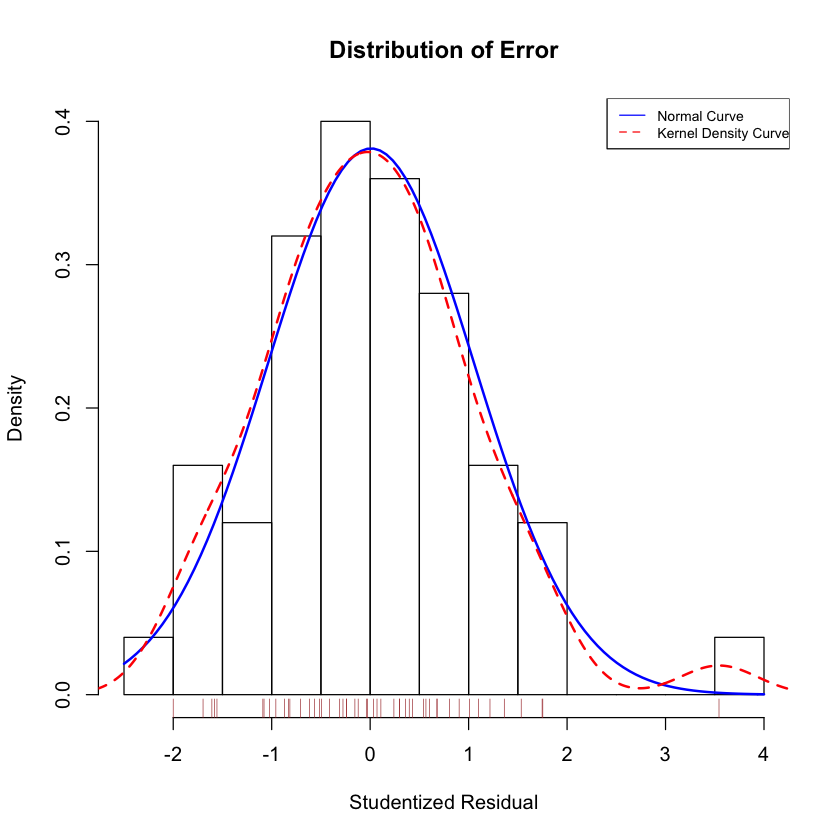

In [23]:
resiplot = function(fit, nbreaks=10){
    z = rstudent(fit)
    hist(z, breaks = nbreaks, freq=FALSE, xlab="Studentized Residual", main="Distribution of Error")
    rug(jitter(z), col="Brown")
    curve(dnorm(x, mean=mean(z), sd=sd(z)), 
          add=TRUE, col='blue', lwd=2)
    lines(density(z)$x, density(z)$y, col='red', lwd=2, lty=2)
    legend("topright", 
           legend = c("Normal Curve", "Kernel Density Curve"),
           lty=1:2, col=c("blue", "red"), cex=.7)
}

resiplot(fit)

#### 2 Independence of error

In [24]:
durbinWatsonTest(fit)

 lag Autocorrelation D-W Statistic p-value
   1      -0.2006929      2.317691   0.246
 Alternative hypothesis: rho != 0

#### 3 Linearity

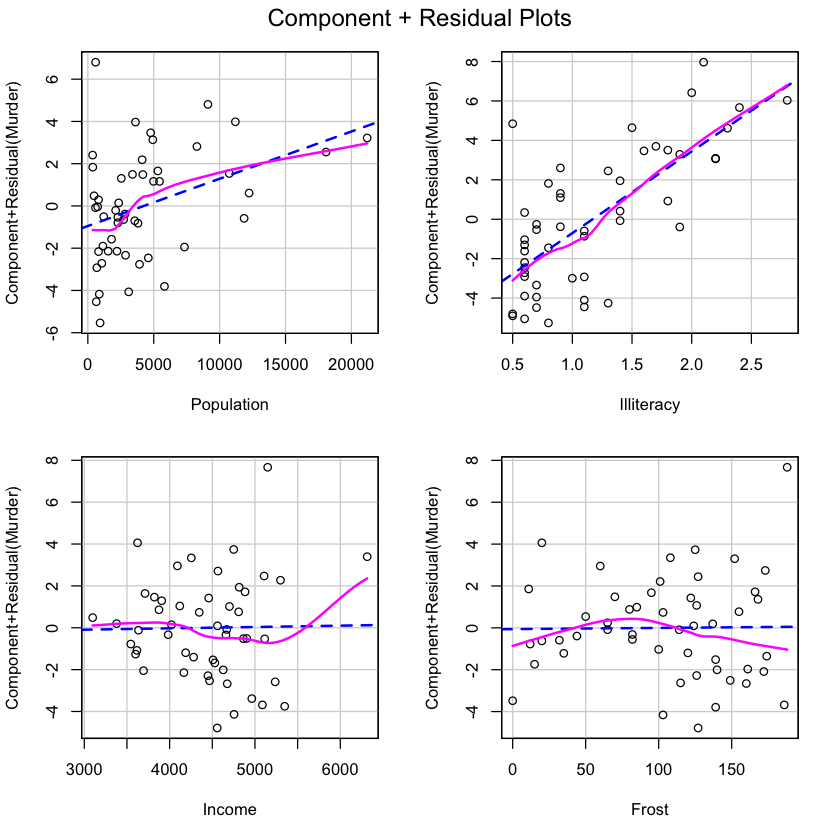

In [25]:
library(car)
crPlots(fit)

#### 4 Homoscedasticity

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.746514, Df = 1, p = 0.18632


Suggested power transformation:  1.209626 

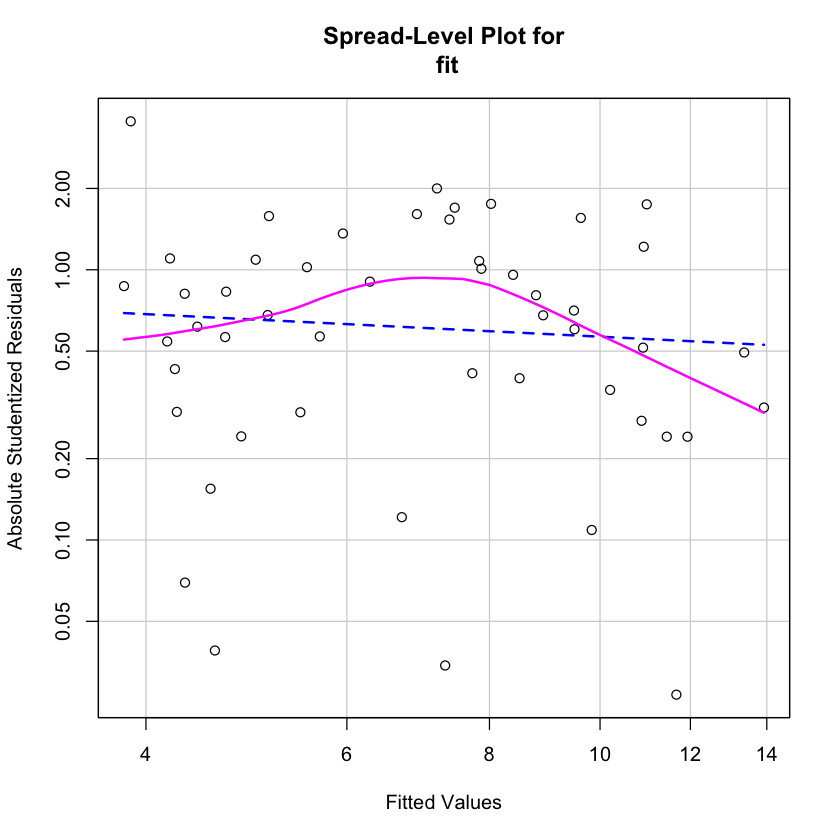

In [26]:
library(car)
ncvTest(fit)
spreadLevelPlot(fit)

### Global validation of linear model assumption

In [27]:
library(gvlma)
gvmodel = gvlma(fit)
summary(gvmodel)


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit) 

                    Value p-value                Decision
Global Stat        2.7728  0.5965 

### Multicollinearity

In [28]:
library(car)
vif(fit)  ## vif: Variance Inflation Factor

Population Illiteracy     Income      Frost 
  1.245282   2.165848   1.345822   2.082547

we consider multicollinearity when sqrt(vif)>2

In [29]:
sqrt(vif(fit)) > 2 

Population Illiteracy     Income      Frost 
     FALSE      FALSE      FALSE      FALSE

## Unusual Observations
A comprehensive regression analysis will also include a screening for unusual observations—namely outliers, high-leverage observations, and influential observations. These are data points that warrant further investigation, either because they’re different than other observations in some way, or because they exert a disproportionate amount of influence on the results. Let’s look at each in turn.

### outliers
Outliers are observations that aren’t predicted well by the model.

In [30]:
library(car)
outlierTest(fit)

       rstudent unadjusted p-value Bonferonni p
Nevada 3.542929         0.00095088     0.047544

### High-leverage point
Observations that have high leverage are outliers with regard to the other predictors.  
High-leverage observations may or may not be influential observations. That willl depend on whether they are outliers.

In [31]:
hat.plot = function(fit){
    p = length(coefficients(fit))
    n = length(fitted(fit))
    plot(hatvalues(fit), main="Index Plot of Hat Values")
    abline(h = c(2,3)*p/n, col = "red", lty=2)
    identify(1:n, hatvalues(fit), names(hatvalues(fit)))
}

integer(0)

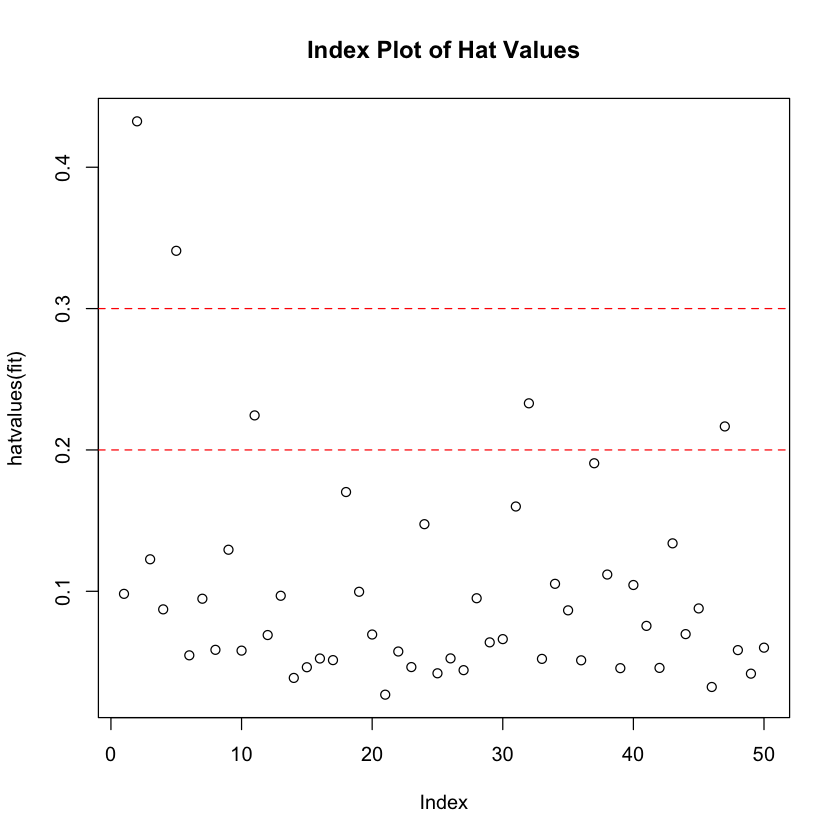

In [32]:
hat.plot(fit)

### Influential Observations
Influential observations have a disproportionate impact on the values of the model parameters. We could use following methods.
 - cook's distance (D statistic)  
 if cook's distance > 4/(n-k-1), we regards this observation as influential observation.  
 n: sample size, k: number of predict variabls.
 - added variable plot

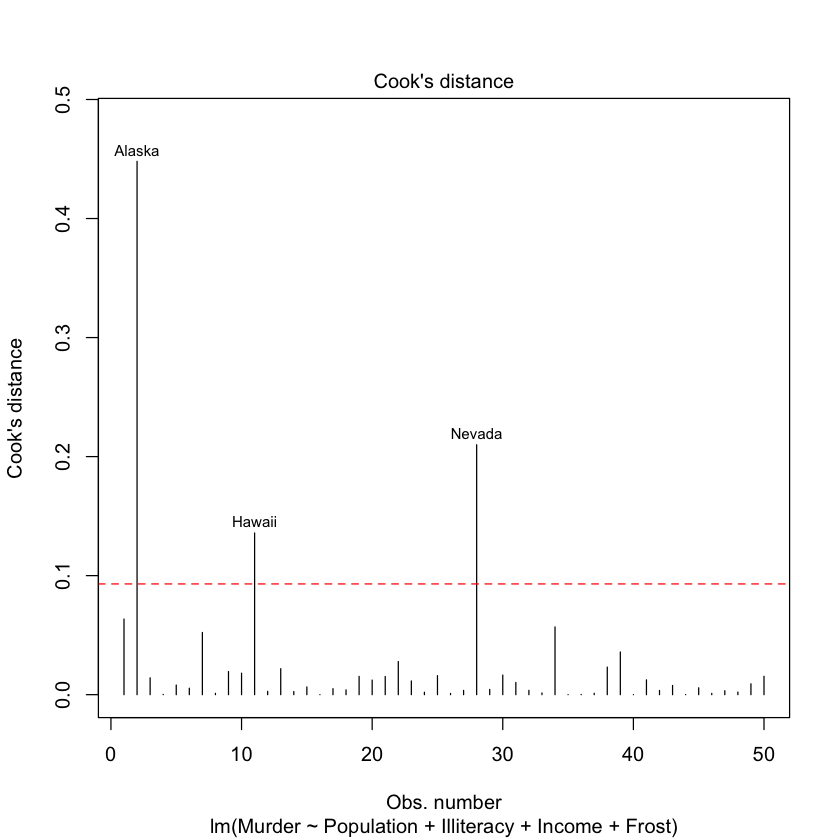

In [33]:
## Cook's distance
cutoff =  4/(nrow(states)-length(fit$coefficients)-2)
plot(fit, which = 4, cook.levels = cutoff)
abline(h = cutoff, lty = 2, col = "red")

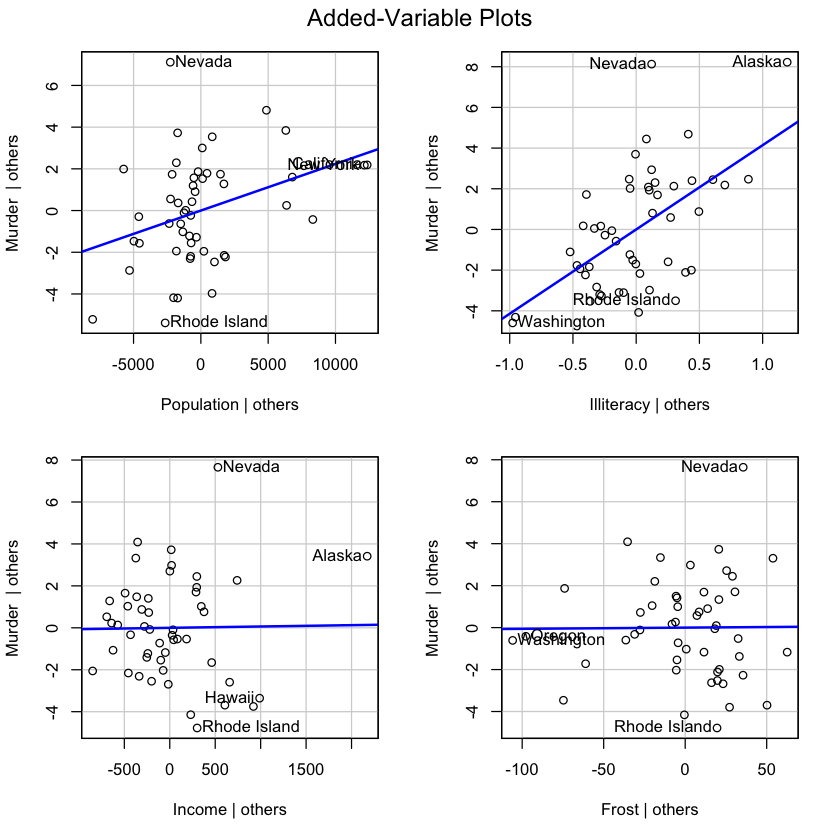

In [38]:
## added variable plot
library(car)
avPlots(fit, ask = FALSE)


,StudRes,Hat,CookD
Alaska,1.7536917,0.43247319,0.448050997
California,-0.2761492,0.34087628,0.008052956
Nevada,3.5429286,0.09508977,0.209915743
Rhode Island,-2.0001631,0.04562377,0.035858963


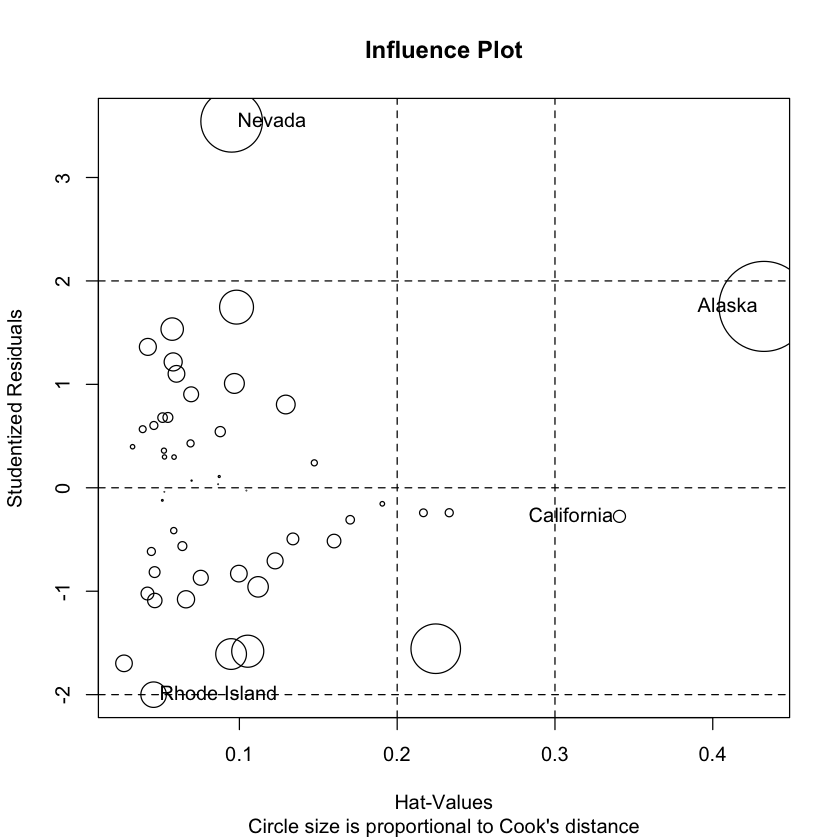

In [39]:
library(car)
influencePlot(fit, main = "Influence Plot", 
             sub = "Circle size is proportional to Cook's distance")

## Corrective measures
 - Deleting obsrevations
 - Transforming variables
 - Adding/Deteling variables
 - Using another regression approach

In [40]:
## transform variables using Box-Cox transform
library(car)
summary(powerTransform(states$Murder))

bcPower Transformation to Normality 
              Est Power Rounded Pwr Wald Lwr Bnd Wald Upr Bnd
states$Murder    0.6055           1       0.0884       1.1227

Likelihood ratio test that transformation parameter is equal to 0
 (log transformation)
                           LRT df     pval
LR test, lambda = (0) 5.665991  1 0.017297

Likelihood ratio test that no transformation is needed
                           LRT df    pval
LR test, lambda = (1) 2.122763  1 0.14512

In [41]:
### using boxTidwell
library(car)
boxTidwell(Murder~Population+Illiteracy, data=states)

           MLE of lambda Score Statistic (z) Pr(>|z|)
Population       0.86939             -0.3228   0.7468
Illiteracy       1.35812              0.6194   0.5357

iterations =  19 

## Selecting best regression model
### Compare models using anova()

In [43]:
fit1 = lm(Murder ~ Population + Illiteracy + Income + Frost, data = states)
fit2 = lm(Murder ~ Population + Illiteracy, data=states)
anova(fit2, fit1)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
47,289.2457,NA,NA,NA,NA
45,289.1672,2,0.07850518,0.006108462,0.993911


In [44]:
AIC(fit1, fit2)

,df,AIC
fit1,6,241.6429
fit2,4,237.6565


### choose variables

In [45]:
library(MASS)
fit = lm(Murder ~ Population + Illiteracy + Income + Frost, 
          data = states)
stepAIC(fit, direction = "backward")

Start:  AIC=97.75
Murder ~ Population + Illiteracy + Income + Frost

             Df Sum of Sq    RSS     AIC
- Frost       1     0.021 289.19  95.753
- Income      1     0.057 289.22  95.759
<none>                    289.17  97.749
- Population  1    39.238 328.41 102.111
- Illiteracy  1   144.264 433.43 115.986

Step:  AIC=95.75
Murder ~ Population + Illiteracy + Income

             Df Sum of Sq    RSS     AIC
- Income      1     0.057 289.25  93.763
<none>                    289.19  95.753
- Population  1    43.658 332.85 100.783
- Illiteracy  1   236.196 525.38 123.605

Step:  AIC=93.76
Murder ~ Population + Illiteracy

             Df Sum of Sq    RSS     AIC
<none>                    289.25  93.763
- Population  1    48.517 337.76  99.516
- Illiteracy  1   299.646 588.89 127.311



Call:
lm(formula = Murder ~ Population + Illiteracy, data = states)

Coefficients:
(Intercept)   Population   Illiteracy  
  1.6515497    0.0002242    4.0807366  


## All subsets regression

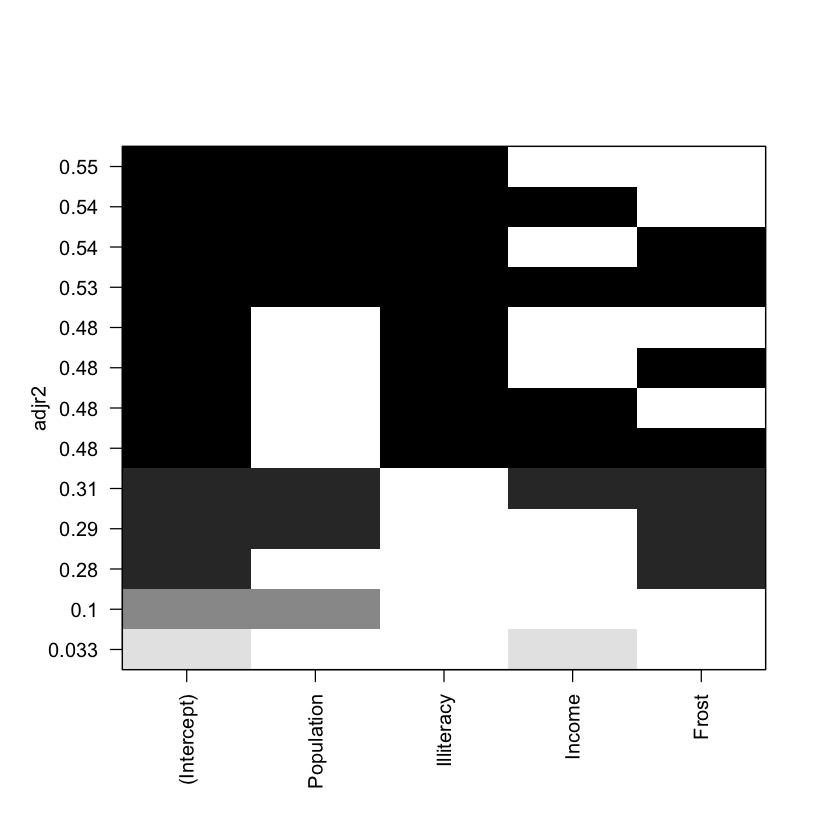

In [51]:
library(leaps)
leaps = regsubsets(Murder ~ Population + Illiteracy + Income + Frost,
                  data = states, nbest = 4)
plot(leaps, scale = "adjr2")


,Abbreviation
Population,P
Illiteracy,Il
Income,In
Frost,F


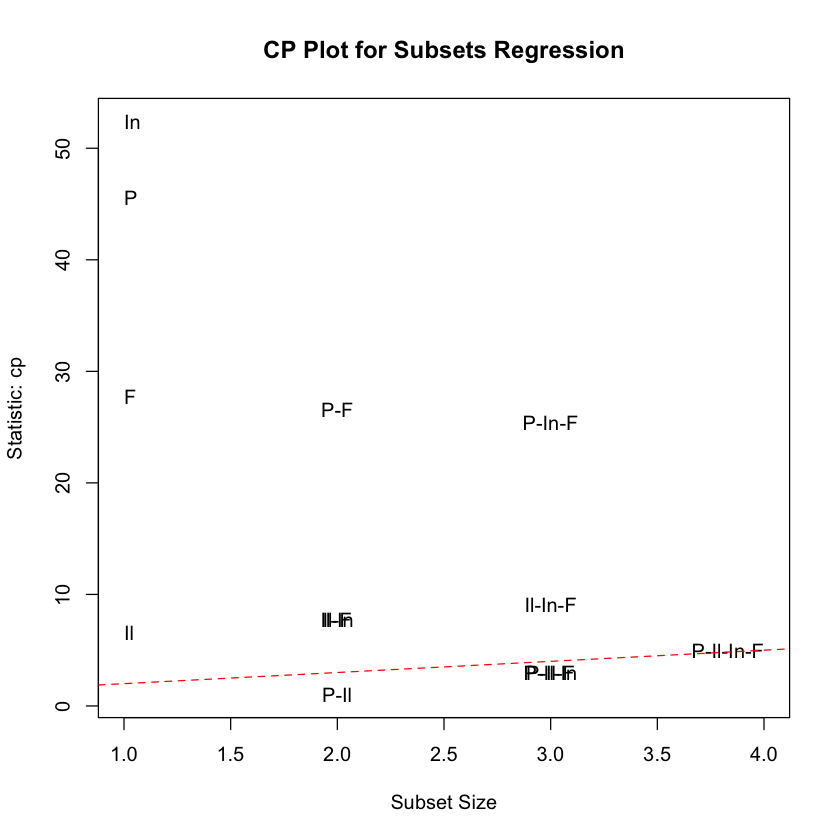

In [61]:
library(car)
subsets(leaps, statistic="cp", legend = TRUE,
        main = "CP Plot for Subsets Regression")
abline(1, 1, lty=2, col="red")

## Take the analysis further

In [62]:
shrinkage = function(fit, k=10){
    require(bootstrap)
    
    theta.fit = function(x, y){ lsfit(x, y) }
    theta.predict = function(fit, x){ cbind(1,x) %*% fit$coef}
    
    x = fit$model[, 2:ncol(fit$model)]
    y = fit$model[, 1]
    
    results = crossval(x, y, theta.fit, theta.predict, ngroup=k)
    r2 = cor(y, fit$fitted.values)^2
    r2cv = cor(y, results$cv.fit)^2
    cat("Original R-square =", r2, "\n")
    cat(k, "Fold Cross-Validated R-Squre =", r2cv, "\n")
    cat("Change = ", r2-r2cv, "\n")
}

In [64]:
fit = lm(Murder ~ Population + Illiteracy + Income + Frost, 
          data = states)
shrinkage(fit)

Loading required package: bootstrap


Original R-square = 0.5669502 
10 Fold Cross-Validated R-Squre = 0.5003665 
Change =  0.06658375 


In [65]:
fit2 = lm(Murder ~ Population + Illiteracy, data = states)
shrinkage(fit)

Original R-square = 0.5669502 
10 Fold Cross-Validated R-Squre = 0.461474 
Change =  0.1054762 


## relative importance

In [72]:
relweights = function(fit){
    R = cor(fit$model)
    nvar = ncol(R)
    rxx = R[2:nvar, 2:nvar]
    rxy = R[2:nvar, 1]
    svd = eigen(rxx)
    evec = svd$vectors
    ev = svd$values
    delta = diag(sqrt(ev))
    lambda = evec %*% delta %*% t(evec)
    lambdasq = lambda ^ 2
    beta = solve(lambda) %*% rxy
    rsquare = colSums(beta^2)
    rawwgt = lambdasq %*% beta ^2
    
    import = (rawwgt / rsquare) * 100
    lbls = names(fit$model[2:nvar])
    rownames(import) = lbls
    colnames(import) = "Weights"
    barplot(t(import), names.arg = lbls, 
           ylab = "% of R-square",
           xlab = "Predictot  Variables",
           main = "Relative Importnce of Predictor Variables",
           sub = paste("R-Square=", round(rsquare, digits = 3)))
    return (import)
}

,Weights
Population,14.723401
Illiteracy,59.000195
Income,5.488962
Frost,20.787442


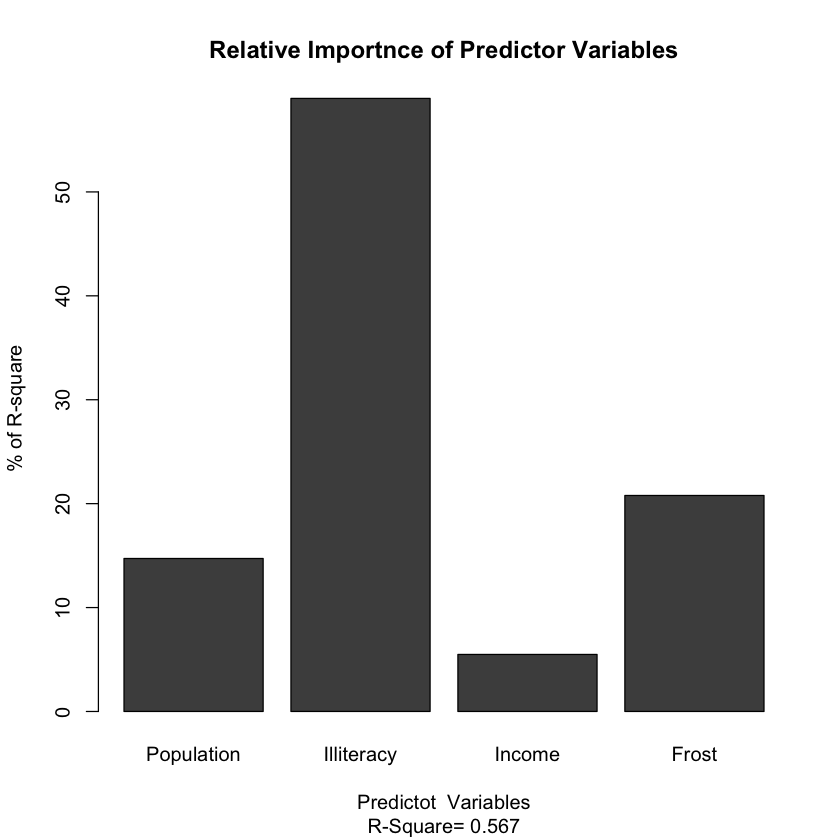

In [73]:
fit = lm(Murder ~ Population + Illiteracy + Income + Frost, 
          data = states)
relweights(fit)